In [2]:
import cv2
import os
import xml.etree.ElementTree as ET
import glob
import matplotlib.pyplot as plt
import torchreid

In [56]:
torchreid.models.show_avai_models()

['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'resnext50_32x4d', 'resnext101_32x8d', 'resnet50_fc512', 'se_resnet50', 'se_resnet50_fc512', 'se_resnet101', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'densenet121_fc512', 'inceptionresnetv2', 'inceptionv4', 'xception', 'resnet50_ibn_a', 'resnet50_ibn_b', 'nasnsetmobile', 'mobilenetv2_x1_0', 'mobilenetv2_x1_4', 'shufflenet', 'squeezenet1_0', 'squeezenet1_0_fc512', 'squeezenet1_1', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'mudeep', 'resnet50mid', 'hacnn', 'pcb_p6', 'pcb_p4', 'mlfn', 'osnet_x1_0', 'osnet_x0_75', 'osnet_x0_5', 'osnet_x0_25', 'osnet_ibn_x1_0', 'osnet_ain_x1_0', 'osnet_ain_x0_75', 'osnet_ain_x0_5', 'osnet_ain_x0_25']


In [87]:
!python3 creating\ dataset\ folders.py

['reid 9', 'reid 6', 'reid 8', 'reid 11', 'reid 10', 'reid 7']
file frame_000399 completed!
file frame_000399 completed!
file frame_000136 completed!
file frame_000399 completed!
file frame_000136 completed!
file frame_000259 completed!


In [23]:
with open('./reid dataset split/labels.txt', 'r') as f:
    lbls = f.readlines()

In [24]:
lbls[0]

'./reid dataset split/images_all/img_0_0.PNG 0 0\n'

In [37]:
with open('./reid dataset split/labels.txt', 'r') as f:
    labels = f.readlines()
            
labels = [[x for x in label.split()] for label in labels]
for i in range(len(labels)):
    labels[i] = [labels[i][0]+" "+labels[i][1]+" "+labels[i][2],labels[i][3],labels[i][4]]
    labels[i][1] = int(labels[i][1])
    labels[i][2] = int(labels[i][2])

In [60]:
[a[0],b[0]]

[(1, 2), (4, 2)]

In [63]:
tuple(a[1:])

((2, 2), (3, 2))

In [64]:
[list(x) for x in a+b]

[[1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2]]

In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

import sys
import os
import os.path as osp

from torchreid.data import ImageDataset


class DogsDataset(ImageDataset):
    dataset_dir = 'dog_reid_dataset_all'

    def __init__(self, root='', **kwargs):
        self.root = osp.abspath(osp.expanduser(root))
        self.dataset_dir = osp.join(self.root, self.dataset_dir)

        # All you need to do here is to generate three lists,
        # which are train, query and gallery.
        # Each list contains tuples of (img_path, pid, camid),
        # where
        # - img_path (str): absolute path to an image.
        # - pid (int): person ID, e.g. 0, 1.
        # - camid (int): camera ID, e.g. 0, 1.
        # Note that
        # - pid and camid should be 0-based.
        # - query and gallery should share the same pid scope (e.g.
        #   pid=0 in query refers to the same person as pid=0 in gallery).
        # - train, query and gallery share the same camid scope (e.g.
        #   camid=0 in train refers to the same camera as camid=0
        #   in query/gallery).
        with open('./reid dataset far/labels.txt', 'r') as f:
            labels = f.readlines()
            
        labels = [[x for x in label.split()] for label in labels]
        for i in range(len(labels)): #I didnt think for some reason that split() is going to split the name of the folder. Should have name it reid-dataset-split
            labels[i] = [labels[i][0]+" "+labels[i][1]+" "+labels[i][2],labels[i][3],labels[i][4]]
            labels[i][1] = int(labels[i][1])
            labels[i][2] = int(labels[i][2])
            
        # labels = [tuple(x) for x in labels]
        alpha = [x for x in labels if x[1] == 0]
        beta = [x for x in labels if x[1] == 1]
        query = [tuple(alpha[0]),tuple(beta[0])]
        alpha = alpha[1:]
        beta = beta[1:]
        a08 =round(len(alpha)*0.8)
        b08 =round(len(beta)*0.8)
        train = [tuple(x) for x in alpha[:a08]+beta[:b08]]
        gallery = alpha[a08:]+beta[b08:]
        for i in range(len(gallery)):
            gallery[i][2] = 1
        gallery = [tuple(x) for x in gallery]
        

        super(DogsDataset, self).__init__(train, query, gallery, **kwargs)

In [3]:
torchreid.data.register_image_dataset('dog_reid_dataset_far', DogsDataset)

In [4]:
datamanager = torchreid.data.ImageDataManager(
    root='reid-data',
    sources='dog_reid_dataset_far',  
    transforms=["random_flip","color_jitter"]
)

Building train transforms ...
+ resize to 256x128
+ random flip
+ color jitter
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded DogsDataset
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |     2 |     6612 |         1
  query    |     2 |        2 |         1
  gallery  |     2 |     1653 |         1
  ----------------------------------------
=> Loading test (target) dataset
=> Loaded DogsDataset
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |     2 |     6612 |         1
  query    |     2 |        2 |         1
  gallery  |     2 |     1653 |         

In [7]:
from torchreid.utils import load_pretrained_weights

weight_path = 'log/osnet_x0_25-softmax-dogs_dataset/model/osnet_x0_25.pth.tar'

model = load_pretrained_weights("osnet_x0_25", weight_path)


AttributeError: 'str' object has no attribute 'state_dict'

In [10]:

model = torchreid.models.build_model(
    name='osnet_x0_25', #osnet
    num_classes=datamanager.num_train_pids,
    loss='softmax'
)
model = model.cuda()
optimizer = torchreid.optim.build_optimizer(
    model, optim='adam', lr=0.0003
)
scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler='single_step',
    stepsize=20
)
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager, model, optimizer, scheduler=scheduler
)
engine.run(
    max_epoch=5,
    save_dir='log/osnet_x0_25-softmax-dogs_dataset_far',
    print_freq=40,
    eval_freq = 40,
    test_only = False
)

Successfully loaded imagenet pretrained weights from "/home/valentin/.cache/torch/checkpoints/osnet_x0_25_imagenet.pth"
** The following layers are discarded due to unmatched keys or layer size: ['classifier.weight', 'classifier.bias']
=> Start training
epoch: [1/5][40/206]	time 0.146 (0.161)	data 0.000 (0.013)	eta 0:02:39	loss 0.4405 (0.5170)	acc 81.2500 (77.8906)	lr 0.000300
epoch: [1/5][80/206]	time 0.146 (0.155)	data 0.000 (0.007)	eta 0:02:27	loss 0.3053 (0.4344)	acc 96.8750 (84.5703)	lr 0.000300
epoch: [1/5][120/206]	time 0.146 (0.152)	data 0.000 (0.005)	eta 0:02:18	loss 0.2492 (0.3926)	acc 100.0000 (87.6823)	lr 0.000300
epoch: [1/5][160/206]	time 0.146 (0.151)	data 0.000 (0.003)	eta 0:02:11	loss 0.2439 (0.3645)	acc 100.0000 (89.7266)	lr 0.000300
epoch: [1/5][200/206]	time 0.145 (0.150)	data 0.000 (0.003)	eta 0:02:04	loss 0.2860 (0.3437)	acc 93.7500 (91.2500)	lr 0.000300
epoch: [2/5][40/206]	time 0.146 (0.154)	data 0.000 (0.006)	eta 0:02:00	loss 0.2339 (0.2395)	acc 100.0000 (98.82

In [ ]:
%load_ext tensorboard
!tensorboard --logdir log

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2022-08-08 22:40:59.308107: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-08 22:40:59.472538: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-08-08 22:41:00.058931: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-08-08 22:41:00.059044: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic

In [74]:
model = torchreid.utils.load_pretrained_weights('osnet_x0_25', "./log/osnet_x0_25-softmax-dogs_dataset/model/model.pth.tar-10")

engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager, model, optimizer, scheduler=scheduler
)
engine.run(
    test_only = True,
    max_epoch=300,
    save_dir="/log/osnet_x0_25-softmax-dogs_dataset",
    print_freq=10 #изменить
)

AttributeError: 'str' object has no attribute 'state_dict'

In [9]:
list(os.walk("./reid dataset raw"))[0][1]

['.ipynb_checkpoints',
 'reid 9',
 'reid 6',
 'reid 8',
 'reid 11',
 'reid 10',
 'reid 7']

In [66]:
round(1.5)

2

./reid dataset raw/reid 9/Annotations/*.xml
frame_001013
./reid dataset split/images_all/img_0_0.PNG 0 0


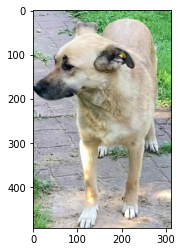

In [67]:
classes = []
labels_input_dir = "./reid dataset raw/"
labels_output_dir = "./reid dataset split/labels_all/"
images_input_dir = "./reid dataset raw/"
images_output_dir = "./reid dataset split/images_all/"

# create the labels folder (output directory)
# os.mkdir(labels_output_dir)
# os.mkdir(images_output_dir)



name_id = 0 # since I'm saving all bboxes from all frames of all vids I need to
all_vids = os.listdir("./reid dataset raw") #dirs of all vids
all_vids.remove('.ipynb_checkpoints')
# identify all the xml files in the annotations folder (input directory)
for directory in all_vids:
    print(os.path.join(labels_input_dir,directory,"Annotations", '*.xml'))
    files = glob.glob(os.path.join(labels_input_dir,directory,"Annotations",'*.xml'))
    # loop through each 
    for fil in files:
        basename = os.path.basename(fil) #name of file in folder
        filename = os.path.splitext(basename)[0]
        # check if the label contains the corresponding image file
        if not os.path.exists(os.path.join(images_input_dir,directory,"JPEGImages", f"{filename}.PNG")):
            print(f"{filename} image does not exist!")
            continue

        # parse the content of the xml file
        tree = ET.parse(fil)
        root = tree.getroot()
        width = int(root.find("size").find("width").text)
        height = int(root.find("size").find("height").text)

        for obj in root.findall('object'):
            label = obj.find("name").text
            # check for new classes and append to list
            if label not in classes:
                classes.append(label)  
            index = classes.index(label)
            pil_bbox = [round(float(x.text)) for x in obj.find("bndbox")]
            img = cv2.imread(os.path.join(images_input_dir,directory,"JPEGImages", f"{filename}.PNG"))
            crop_img = img[pil_bbox[1]:pil_bbox[3], pil_bbox[0]:pil_bbox[2]]
            crop_img = crop_img[...,::-1]
            print(filename)
            new_imname= os.path.join(images_output_dir,f"img_{name_id}_{index}.PNG")
            print(" ".join([str(new_imname),str(index),"0"]))
            plt.imshow(crop_img)
            break
        break
    break
    